# Effects of Loan Characterics on Borrower's APR and RATE
## by Muthukumar Palavesam

## Investigation Overview

> In this presentation, I am exploring sevral loan characterics and visualize by comparing those characterics with Borrower's APR and RATE.The main characterics are BorrowerRate,BorrowerAPR, ProsperScore, ProsperRating, HomeownerStatus and CreditScoreRangeUpper

## Dataset Overview

> Prosper is America’s first marketplace lending platform, with over $10 billion in funded loans.This Exploratory Data Analysis scope covers loan information for over a 100,000 people between the years 2006 and 2013.This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information

In [64]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML,Markdown,Image
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 500)
sns.set_style("darkgrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [65]:
# load in the dataset into a pandas dataframe
prosper_cleaned_df=pd.read_csv('prosper_cleaned.csv')
median_rate=pd.read_csv('median_rate.csv')

#`loandate` is showing as string, so it needs to be converted to DateTime
prosper_cleaned_df['loandate']=pd.to_datetime(prosper_cleaned_df['loandate'])

##Using astype to convert into category
prosper_cleaned_df['ListingCategory']=prosper_cleaned_df['ListingCategory'].astype('category')
prosper_cleaned_df['HomeownerStatus']=prosper_cleaned_df['HomeownerStatus'].astype('category')
prosper_cleaned_df['ProsperRating']=prosper_cleaned_df['ProsperRating'].astype('category')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower Interest Rate graph over the year

> Borrowers interest rate increased from 2005-2006 and decreased from 2006-2007. After 2007 interest rate constantly shoot up for few years, then reached its peak in 2011 which then started decreasing constantly.

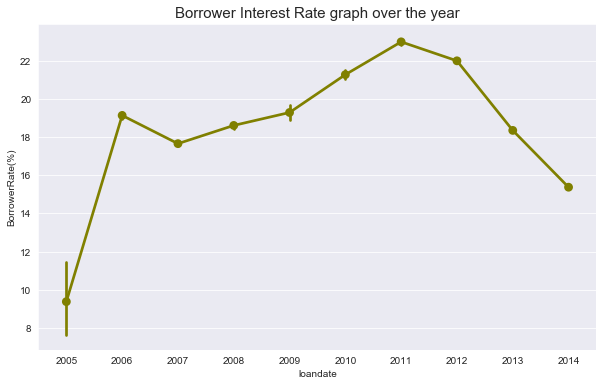

In [66]:
## plots the pointplot for year vs BorrowerRate
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(prosper_cleaned_df['loandate'].dt.year,prosper_cleaned_df['BorrowerRate(%)'],color='olive',ax=ax);

#set the labels and titles of the plot.
plt.title('Borrower Interest Rate graph over the year',fontsize=15);

## BorrowerAPR vs ProsperRating

> The boxplots shows the relationship between borrower’s Prosper rating and their assigned Annual Percentage Rate (APR). The APR for the borrower reduces drastically from a ‘High Risk (HR)’ to an ‘AA’ rating. if you see the results, it goes from a median APR of 35.8% for High Risk all the way to a median value of 9% for ‘AA’. So the lowerest rating(HR) customers have the highest APR percentage, and highest rating (AA) customers have the lowers APR percentage.

ProsperRating,BorrowerAPR(%)
HR,35.8
E,33.22
D,28.49
C,22.36
B,18.17
A,13.8
AA,9


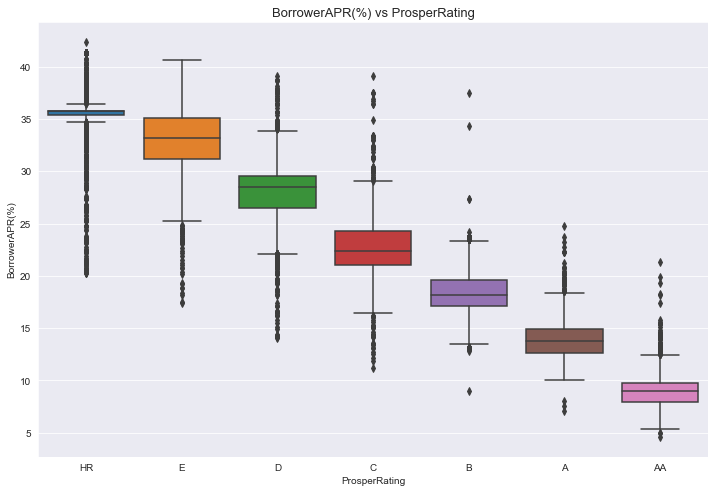

In [67]:
#Displaying the median APR for Prosper Rating
median_df=prosper_cleaned_df.groupby('ProsperRating').median()['BorrowerAPR(%)'].sort_values(ascending=False)
display(median_df.reset_index().style.hide_index())

#boxplot between ProsperRating and APR
prosper_order=['HR','E','D','C','B','A','AA']
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(prosper_cleaned_df['ProsperRating'],prosper_cleaned_df['BorrowerAPR(%)'],ax=ax,order=prosper_order);

#set the labels and titles of the plot.
plt.title('BorrowerAPR(%) vs ProsperRating',fontsize=13);

## BorrowerAPR vs ProsperScore

>There is a negative relationship between BorrowerAPR and ProsperScore. Because <b>higher prosperscore is showing as lower APR</b>. This make sense because the borrower with higher rating tend to be more reliable and therefore given lower BorrowerAPR

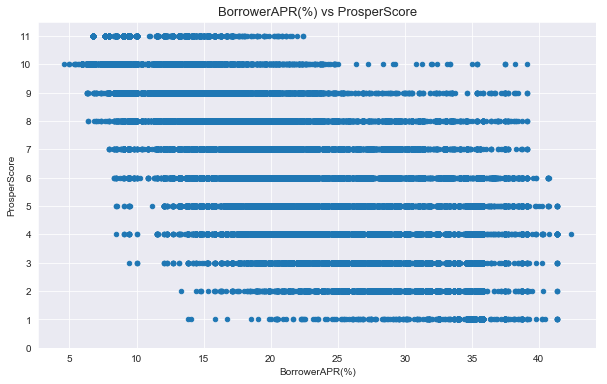

In [68]:
## scatter plot for comparing ProsperScore and BorrowerAPR. 
prosper_cleaned_df.plot(kind='scatter',x='BorrowerAPR(%)',y='ProsperScore',figsize=(10,6),yticks= np.arange(0,12,1));

#set the labels and titles of the plot.
plt.title('BorrowerAPR(%) vs ProsperScore',fontsize=13);

## Homeowners vs Interest Rate
>Homeowner customer getting lower interest rate</b>. This makes sense because If someone has a house,might be more confident that the customers will have conditions to pay back.

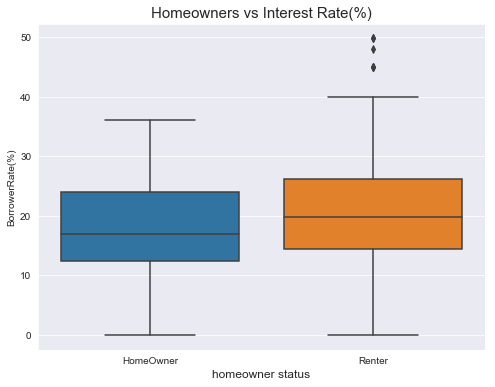

In [69]:
#boxplot between Homeowners and Interest Rate
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(prosper_cleaned_df['HomeownerStatus'],prosper_cleaned_df['BorrowerRate(%)'],ax=ax);

#set the labels and titles of the plot.
plt.xlabel('homeowner status',fontsize=12)
plt.title('Homeowners vs Interest Rate(%)',fontsize=15);

## How borrower interest rate changed over the years for owner and renter
>I studied the relationships among three variables (borrower  rate, time, and whether the borrower is a homeowner or not). The boxplot clearly shows that the <b>homeowner customer getting lower interest rate in general throughout the years</b>. This makes sense because If someone has a house,might be more confident that the customers will have conditions to pay back.

loan_booked_year,renter_median_Rate(%),homeowner_median_Rate(%)
2005,8.5,nan
2006,20,16.05
2007,18.5,15.2
2008,17.7,15.15
2009,20.1,15.5
2010,26,18.8
2011,25.99,25.11
2012,22.87,21.99
2013,19.14,16.6
2014,15.85,14


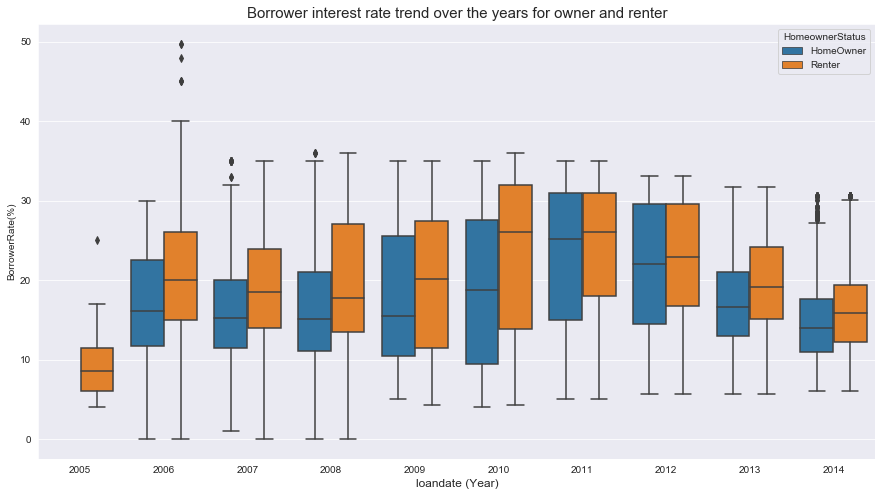

In [70]:
display(median_rate.style.hide_index())

#relationships among three variables: borrower  rate, time, and whether the borrower is a homeowner or not
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(prosper_cleaned_df['loandate'].dt.year,prosper_cleaned_df['BorrowerRate(%)'],\
            ax=ax,hue=prosper_cleaned_df['HomeownerStatus']);

#set the labels and titles of the plot.
plt.xlabel('loandate (Year)',fontsize=12)
plt.title('Borrower interest rate trend over the years for owner and renter',fontsize=15);

##  BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore
>We can see that the `cbscore upper limit` increase as `BorrowerAPR` decrease in the plots. By adding `ProsperScore` to color encodings, <b>BorrowerAPR decreases as ProsperScore increases</b>. This proves the point that <b>cbscore upper limit and ProsperScore negatively correlated to BorrowerAPR</b>.

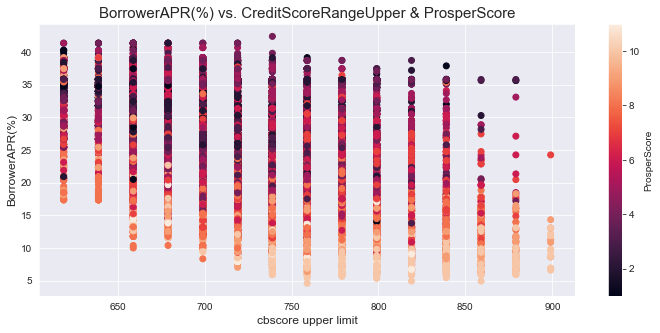

In [71]:
plt.figure(figsize = [12,5])
plt.scatter(data = prosper_cleaned_df, x = 'cbscore_upper_limit', y = 'BorrowerAPR(%)', c = 'ProsperScore');
plt.colorbar(label = 'ProsperScore');

#set the labels and titles of the plot.
plt.xlabel('cbscore upper limit',fontsize=12)
plt.ylabel('BorrowerAPR(%)',fontsize=12)
plt.title('BorrowerAPR(%) vs. CreditScoreRangeUpper & ProsperScore',fontsize=15);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!